In [5]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
plt.rcParams['figure.figsize'] = 15, 10

100%|██████████| 9912422/9912422 [00:00<00:00, 24683710.30it/s]


Extracting ./MNIST/train/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/train/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 58154437.75it/s]

Extracting ./MNIST/train/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/train/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26041591.12it/s]


Extracting ./MNIST/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/train/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14080213.43it/s]


Extracting ./MNIST/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/train/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 108862303.64it/s]

Extracting ./MNIST/test/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 78354265.09it/s]

Extracting ./MNIST/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26853450.69it/s]


Extracting ./MNIST/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4366382.94it/s]


Extracting ./MNIST/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw



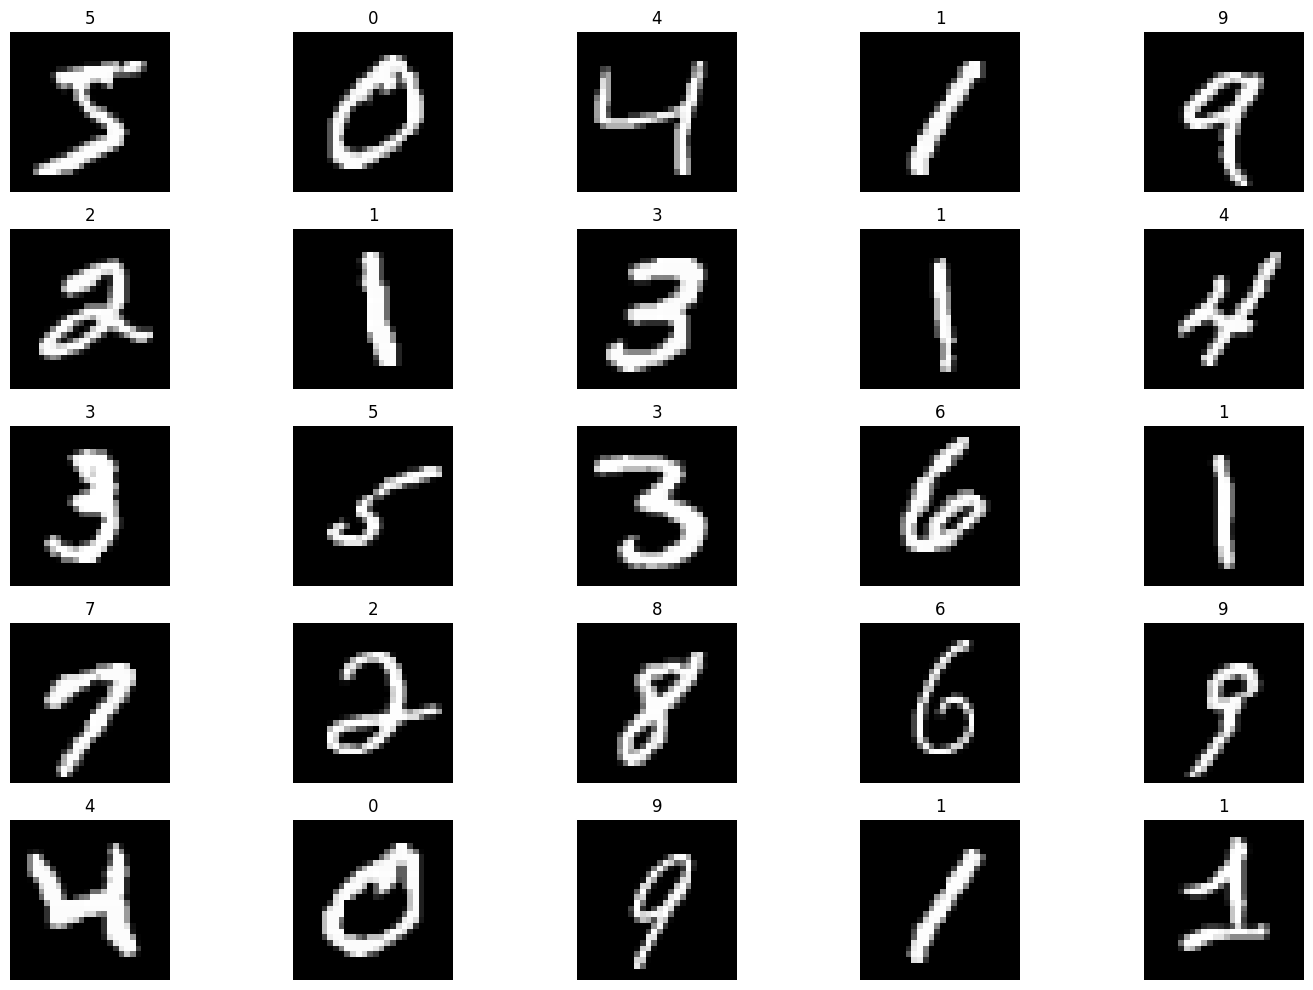

In [6]:
# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
                    torchvision.transforms.ToTensor(),
                    torchvision.transforms.Normalize((0.5), (0.5))
                                            ])

# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root="./MNIST/test", train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True)


# Printing 25 random images from the training dataset
random_samples = np.random.randint(1, len(train_dataset), (25))

for idx in range(random_samples.shape[0]):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')


plt.tight_layout()
plt.show()

Образцы рукописных цифр из набора данных MNIST,

**Превратим данные в вектора**

In [7]:
def encode_label(j):
    # 5 -> [[0], [0], [0], [0], [0], [1], [0], [0], [0], [0]]
    e = np.zeros((10,1))
    e[j] = 1.0
    return e

def shape_data(data):
    features = [np.reshape(x[0][0].numpy(), (784,1)) for x in data]
    #print('features\n', len(features[0]))
    labels = [encode_label(y[1]) for y in data]
    #print('labels\n', len(labels[0]))
    return zip(features, labels)

In [8]:
train = shape_data(train_dataset)
test = shape_data(test_dataset)

In [9]:
train = list(train)
test = list(test)
print('train', len(train))
print('test', len(test))

train 60000
test 10000


In [10]:
def average_digit(data, digit):
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)

In [11]:
avg_digits = []
W_digits = []
# b_digits = []
for i in range(10):
    avg_digits.append(average_digit(train, i))
    W_digits.append(np.transpose(avg_digits[-1]))
    # img = (np.reshape(avg_digits[i], (28, 28)))
    # plt.imshow(img)
    # plt.show()

In [12]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [13]:
def predict(x, W, b):
    return sigmoid(np.dot(W,x) + b)

In [14]:
def predictor(x, W_digits, b):
  vec = []
  for W in W_digits:
    vec.append(predict(x, W, b))
  return vec

In [73]:
b = -45 # 0.59
b = -30 # 0.46
b = -15 # 0.15
b = -60 # 0.61
b = -75 # 0.6125
b = -90 # 0.61283.
# b = -100 # 0.61283.



incorrect_num = 0
n = len(train)
n = 5000
prob_vectors = []
pred_labels = []
# import tqdm
for idx in range(n):
    prob = predictor(train[idx][0], W_digits, b)
    digit = np.where((train[idx][1]) == 1)[0][0]
    prob_vectors.append(prob)
    pred_labels.append(np.argmax(prob))
    if(np.argmax(prob) == digit):
      # print("For ", digit, " predicted", np.argmax(prob), "with val ", np.max(prob),
      #     "for this digit probability is", prob[digit])
      a = 1
    else:
      incorrect_num += 1
print("number of incorrect is", incorrect_num, "and correct is", n - incorrect_num)
print("Accuracy is", (n - incorrect_num) / n)

number of incorrect is 1921 and correct is 3079
Accuracy is 0.6158


In [25]:
selected_images = []
selected_labels = []
for label in range(10):
  indices = np.where(labels == label)
  print(indices)
  # selected_images.extend(train[indices][0])
  # selected_labels.extend(train[indices][1])

array([], dtype=int64)

In [71]:
from sklearn.manifold import TSNE
samples = []
for i in range(10):
  samples.append([])
added = 0
idx = 0
# print(len(train))
samples_per_digit = 30
while(added < 10 * samples_per_digit):
  img = train[idx][0]
  digit = np.where((train[idx][1]) == 1)[0][0]
  # print(digit)
  if(len(samples[digit]) < samples_per_digit):
    samples[digit].append(img)
    added += 1
  idx += 1
  # print(added, idx)
print(len(samples[0][0]))
samples_per_digit = np.asarray(samples_per_digit)
samples_per_digit = np.reshape(samples_per_digit, (300, 784))

784


ValueError: ignored

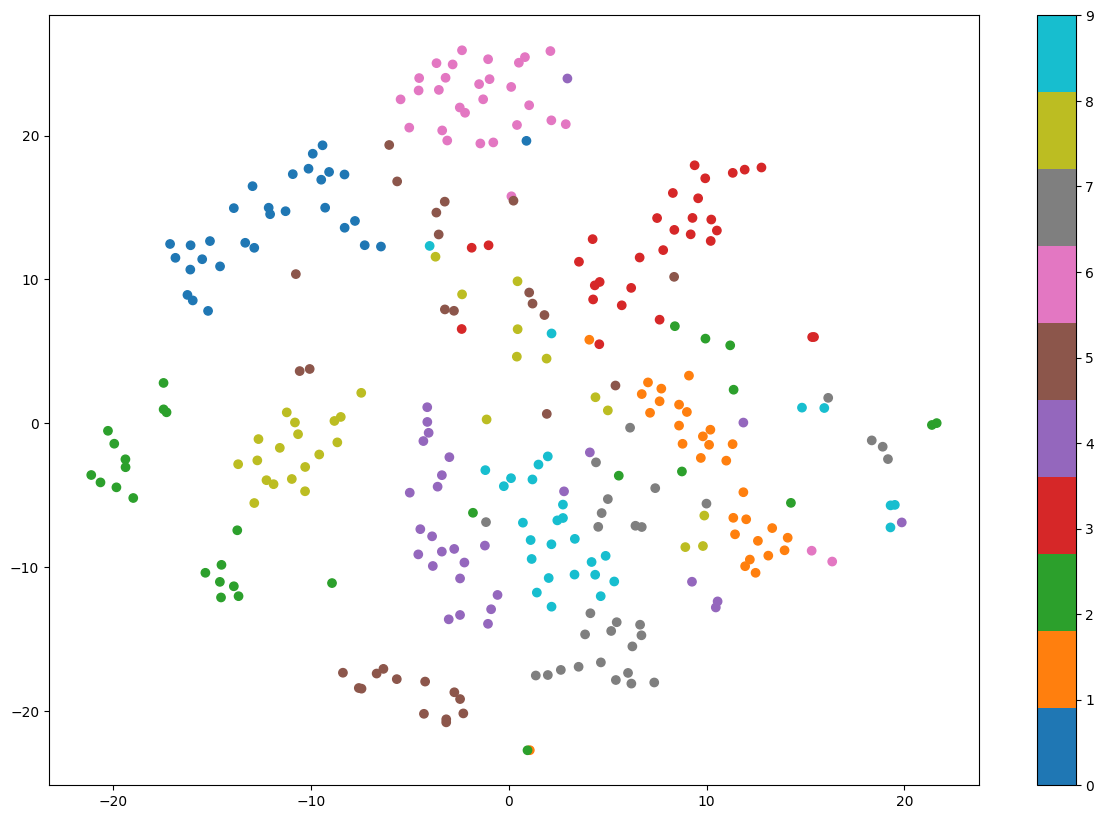

In [57]:
# READY 4
data = []
labels = []
counts = [0,0,0,0,0,0,0,0,0,0]
counter = 0
i = 0
while counter < 300:
  digit = np.where((train[i][1]) == 1)[0][0]
  if(counts[digit] < 30):
    counts[digit] += 1
    data.append(train[i][0])
    labels.append(digit)
    counter += 1
    # print(counts)
  i += 1
# print(len(labels), labels)
data = np.array(data)
labels = np.array(labels)
data = np.reshape(data, (300, 784))
data.shape

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Применение алгоритма t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedded_vectors = tsne.fit_transform(data)

# Визуализация векторов
plt.scatter(embedded_vectors[:, 0], embedded_vectors[:, 1], c=labels, cmap='tab10')
plt.colorbar()
plt.show()

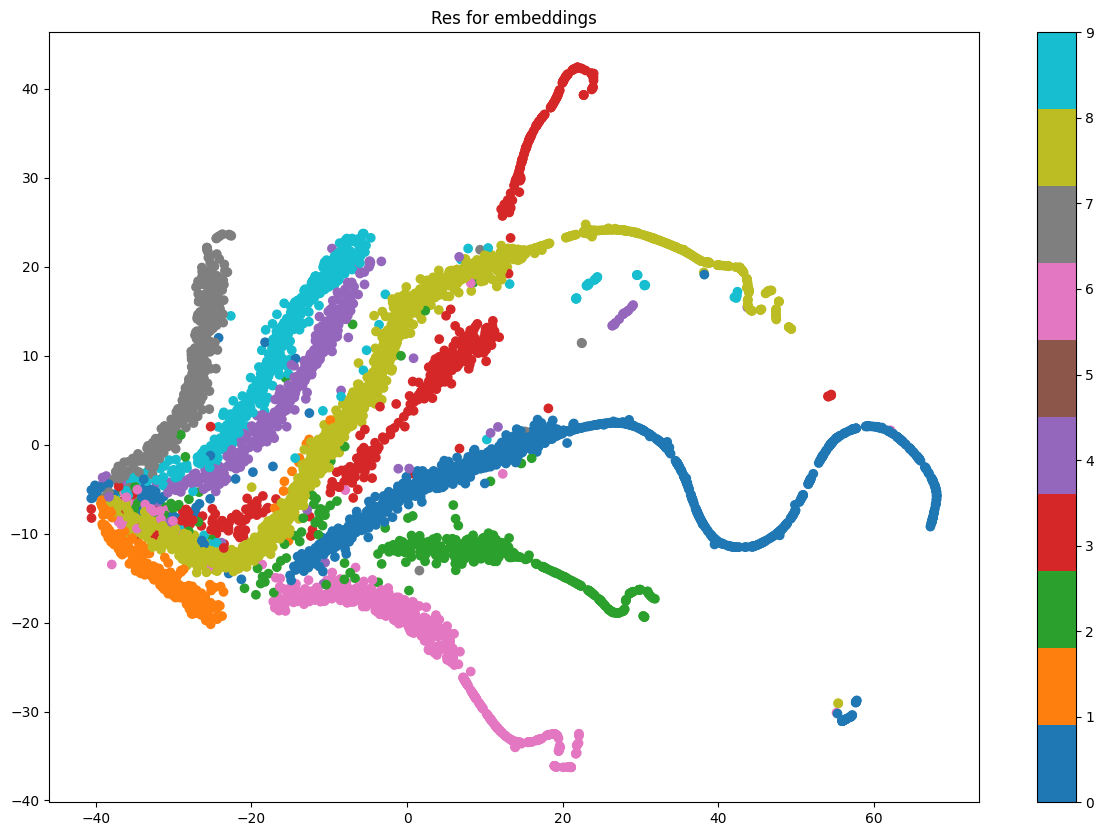

In [74]:
# READY 5
tsne = TSNE(n_components=2)
prob_vectors = np.asarray(prob_vectors)
prob_vectors = np.reshape(prob_vectors, (n, 10))
prob_vectors.shape
embedded_sne = tsne.fit_transform(np.array(prob_vectors))
plt.scatter(embedded_sne[:, 0], embedded_sne[:, 1], c=np.array(pred_labels), cmap="tab10")
plt.colorbar()
plt.title("Res for embeddings")
plt.show()

11490434/11490434 [==============================] - 0s 0us/step


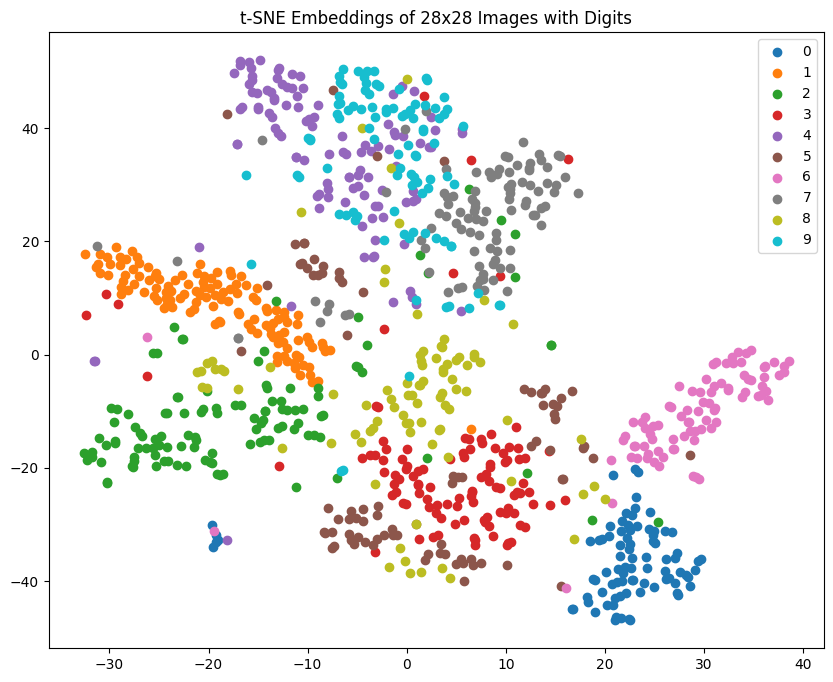

In [28]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Select a subset of the data for visualization
num_samples = 1000
selected_images = test_images[:num_samples]
selected_labels = test_labels[:num_samples]

# Flatten the images
flattened_images = selected_images.reshape(num_samples, -1)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(flattened_images)

# Visualize t-SNE embeddings
plt.figure(figsize=(10, 8))
for digit in range(10):
    digit_indices = selected_labels == digit
    plt.scatter(tsne_result[digit_indices, 0], tsne_result[digit_indices, 1], label=str(digit))

plt.title('t-SNE Embeddings of 28x28 Images with Digits')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Select a subset of the data for visualization
num_samples = 300
selected_images = test_images[:num_samples]
selected_labels = test_labels[:num_samples]

# Flatten the images
flattened_images = selected_images.reshape(num_samples, -1)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(flattened_images)

# Visualize t-SNE embeddings
plt.figure(figsize=(10, 8))
for digit in range(10):
    digit_indices = selected_labels == digit
    plt.scatter(tsne_result[digit_indices, 0], tsne_result[digit_indices, 1], label=str(digit))

plt.title('t-SNE Embeddings of 28x28 Images with Digits')
plt.legend()
plt.show()


# Задание

1. Рассчитать average_digit (матрицу весов) для каждой цифры от 0 до 9, по аналогии с (avg_eight).
2. Объеденить получившиеся веса в одну модель, которая на вход принимает картинку, а выдаёт вектор размера 10.
3. Рассчитать точность получившейся модели на тестовом наборе.
4. Визуализировать набор необработанных данных с помощью алгоритма t-SNE. Взять 30 изображений каждого класса, каждое изображение перевести в вектор размера (784), визуализировать полученные вектора с помощью t-SNE.
5. Визуализировать результаты работы вашей модели (эмбединги) с помощью алгоритма t-SNE. Прогнать изображения через вашу модель, получившиеся вектора размера (10) визуализировать с помощью t-SNE.

## Что должно получиться (примерно):

MNIST_images
<img src="https://github.com/vvabi-sabi/PAC/blob/main/images/LessonsII/mnist_training_data_tSNE.png?raw=1" alt="Regression" height=30% width=30%>
MNIST_embeddings
<img src="https://github.com/vvabi-sabi/PAC/blob/main/images/LessonsII/mnist_embeddings_tSNE.png?raw=1" alt="Regression" height=30% width=30%>